In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [3]:
data0 = pd.read_csv('./data/训练数据.csv')
data0

,date,黄金期货价格,论坛情绪值,美元指数,WTI原油,道琼斯指数,标普500指数,美联储利率,美国CPI月率,GPR,GEPU
0,2014-08-11,260.55,0.0,81.47,98.08,16569.98,1936.90,0.25,0.3,136.45,99.641198
1,2014-08-12,261.00,1.0,81.50,97.37,16560.54,1933.80,0.25,0.3,136.45,99.641198
2,2014-08-13,261.05,0.0,81.60,97.59,16651.80,1946.70,0.25,0.3,136.45,99.641198
3,2014-08-14,261.65,0.0,81.59,95.58,16713.58,1955.20,0.25,0.3,136.45,99.641198
4,2014-08-15,261.40,1.0,81.42,97.35,16662.91,1955.10,0.25,0.3,136.45,99.641198
...,...,...,...,...,...,...,...,...,...,...,...
2430,2024-08-05,559.94,1.0,102.69,72.94,38703.27,5186.33,5.50,-0.1,137.93,219.498876
2431,2024-08-06,554.18,0.0,102.97,73.20,38997.66,5240.03,5.50,-0.1,137.93,219.498876
2432,2024-08-07,556.06,0.0,103.20,75.23,38763.45,5199.50,5.50,-0.1,137.93,219.498876
2433,2024-08-08,556.10,1.0,103.21,76.19,39446.49,5319.31,5.50,-0.1,137.93,219.498876


In [4]:
data0 = data0.iloc[1949:][['date']]
data0

,date
1949,2022-08-10
1950,2022-08-11
1951,2022-08-12
1952,2022-08-15
1953,2022-08-16
...,...
2430,2024-08-05
2431,2024-08-06
2432,2024-08-07
2433,2024-08-08


In [5]:
data0.reset_index(drop = True,inplace = True)
data0

,date
0,2022-08-10
1,2022-08-11
2,2022-08-12
3,2022-08-15
4,2022-08-16
...,...
481,2024-08-05
482,2024-08-06
483,2024-08-07
484,2024-08-08


In [6]:
data = pd.read_csv('./data/LSTM+修正论坛情绪值-预测值.csv')

In [7]:
data

,truth,pred,pred.1,pred.2,pred.3,pred.4
0,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047
1,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671
2,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695
3,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737
4,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124
...,...,...,...,...,...,...
481,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438
482,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578
483,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064
484,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755


In [8]:
data['LSTM+IS+S'] = (data['pred'] + data['pred.1'] + data['pred.2'] +  data['pred.3'] + data['pred.4'])/5

In [9]:
data = pd.concat([data0, data], axis=1)
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
0,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047,5.963662
1,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671,5.966617
2,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695,5.961781
3,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737,5.964884
4,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124,5.975597
...,...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438,6.316644
482,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578,6.314491
483,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064,6.310638
484,2024-08-08,6.320948,6.306051,6.311377,6.306832,6.307106,6.304755,6.307224


In [10]:
data['date'] = pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [11]:
data.index = data.date
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
date,,,,,,,,
2022-08-10,2022-08-10,5.969168,5.961126,5.968853,5.963826,5.963461,5.961047,5.963662
2022-08-11,2022-08-11,5.965018,5.965225,5.970915,5.965611,5.967664,5.963671,5.966617
2022-08-12,2022-08-12,5.969270,5.957880,5.968340,5.960678,5.961311,5.960695,5.961781
2022-08-15,2022-08-15,5.971262,5.964905,5.969045,5.965706,5.964025,5.960737,5.964884
2022-08-16,2022-08-16,5.970037,5.975966,5.978442,5.976543,5.971910,5.975124,5.975597
...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,6.327830,6.314339,6.321615,6.317025,6.316805,6.313438,6.316644
2024-08-06,2024-08-06,6.317490,6.312823,6.319193,6.314431,6.314431,6.311578,6.314491
2024-08-07,2024-08-07,6.320876,6.309450,6.314950,6.310256,6.310470,6.308064,6.310638


In [12]:
data['truth'] = np.exp(data['truth'])
data['LSTM+IS+S'] = np.exp(data['LSTM+IS+S'])

In [13]:
data

,date,truth,pred,pred.1,pred.2,pred.3,pred.4,LSTM+IS+S
date,,,,,,,,
2022-08-10,2022-08-10,391.18,5.961126,5.968853,5.963826,5.963461,5.961047,389.032341
2022-08-11,2022-08-11,389.56,5.965225,5.970915,5.965611,5.967664,5.963671,390.183523
2022-08-12,2022-08-12,391.22,5.957880,5.968340,5.960678,5.961311,5.960695,388.301026
2022-08-15,2022-08-15,392.00,5.964905,5.969045,5.965706,5.964025,5.960737,389.507695
2022-08-16,2022-08-16,391.52,5.975966,5.978442,5.976543,5.971910,5.975124,393.703040
...,...,...,...,...,...,...,...,...
2024-08-05,2024-08-05,559.94,6.314339,6.321615,6.317025,6.316805,6.313438,553.711814
2024-08-06,2024-08-06,554.18,6.312823,6.319193,6.314431,6.314431,6.311578,552.520833
2024-08-07,2024-08-07,556.06,6.309450,6.314950,6.310256,6.310470,6.308064,550.395890


In [14]:
data = data[['truth','LSTM+IS+S']]
data

,truth,LSTM+IS+S
date,,
2022-08-10,391.18,389.032341
2022-08-11,389.56,390.183523
2022-08-12,391.22,388.301026
2022-08-15,392.00,389.507695
2022-08-16,391.52,393.703040
...,...,...
2024-08-05,559.94,553.711814
2024-08-06,554.18,552.520833
2024-08-07,556.06,550.395890


In [15]:
data1 = pd.read_csv('./data/LSTM+论坛情绪值-预测值.csv')
data1

,truth,pred,pred.1,pred.2,pred.3,pred.4
0,5.969168,5.953491,5.947422,5.956945,5.966329,5.952750
1,5.965018,5.958741,5.951240,5.964411,5.969277,5.955420
2,5.969270,5.970298,5.959844,5.978804,5.976882,5.963337
3,5.971262,5.955863,5.950123,5.962621,5.962276,5.958784
4,5.970037,5.957440,5.951698,5.964216,5.963867,5.960376
...,...,...,...,...,...,...
481,6.327830,6.312674,6.299281,6.318428,6.326071,6.310591
482,6.317490,6.292302,6.284871,6.301231,6.308273,6.292785
483,6.320876,6.315863,6.304470,6.327183,6.324035,6.312338
484,6.320948,6.302214,6.290409,6.308789,6.312311,6.302486


In [16]:
data1 = pd.concat([data0, data1], axis=1)
data1

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.953491,5.947422,5.956945,5.966329,5.952750
1,2022-08-11,5.965018,5.958741,5.951240,5.964411,5.969277,5.955420
2,2022-08-12,5.969270,5.970298,5.959844,5.978804,5.976882,5.963337
3,2022-08-15,5.971262,5.955863,5.950123,5.962621,5.962276,5.958784
4,2022-08-16,5.970037,5.957440,5.951698,5.964216,5.963867,5.960376
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.312674,6.299281,6.318428,6.326071,6.310591
482,2024-08-06,6.317490,6.292302,6.284871,6.301231,6.308273,6.292785
483,2024-08-07,6.320876,6.315863,6.304470,6.327183,6.324035,6.312338
484,2024-08-08,6.320948,6.302214,6.290409,6.308789,6.312311,6.302486


In [17]:
data1['LSTM+IS'] = (data1['pred'] + data1['pred.1'] + data1['pred.2'] +  data1['pred.3'] + data1['pred.4'])/5

In [18]:
data1['LSTM+IS'] = np.exp(data1['LSTM+IS'])

In [19]:
data1['date'] = pd.to_datetime(data1['date'], format = '%Y-%m-%d')
data1.index = data1.date
data1= data1[['LSTM+IS']]
data1

,LSTM+IS
date,
2022-08-10,385.826297
2022-08-11,387.539493
2022-08-12,391.440224
2022-08-15,386.809862
2022-08-16,387.423938
...,...
2024-08-05,551.923208
2024-08-06,542.339614
2024-08-07,553.785728


In [20]:
data = pd.concat([data, data1], axis=1)
data

,truth,LSTM+IS+S,LSTM+IS
date,,,
2022-08-10,391.18,389.032341,385.826297
2022-08-11,389.56,390.183523,387.539493
2022-08-12,391.22,388.301026,391.440224
2022-08-15,392.00,389.507695,386.809862
2022-08-16,391.52,393.703040,387.423938
...,...,...,...
2024-08-05,559.94,553.711814,551.923208
2024-08-06,554.18,552.520833,542.339614
2024-08-07,556.06,550.395890,553.785728


In [21]:
data2 = pd.read_csv('./data/LSTM-无外生变量预测值.csv')

In [22]:
data2 = pd.concat([data0, data2], axis=1)
data2

,date,truth,pred,pred.1,pred.2,pred.3,pred.4
0,2022-08-10,5.969168,5.951310,5.960331,5.956617,5.949403,5.960240
1,2022-08-11,5.965018,5.953097,5.962174,5.958436,5.951181,5.962055
2,2022-08-12,5.969270,5.953078,5.962178,5.958547,5.951192,5.962086
3,2022-08-15,5.971262,5.953745,5.962859,5.959132,5.951834,5.962725
4,2022-08-16,5.970037,5.955305,5.964460,5.960705,5.953382,5.964302
...,...,...,...,...,...,...,...
481,2024-08-05,6.327830,6.299319,6.295363,6.301485,6.296156,6.313162
482,2024-08-06,6.317490,6.295620,6.292262,6.298446,6.292596,6.309658
483,2024-08-07,6.320876,6.290555,6.287846,6.293987,6.287619,6.304643
484,2024-08-08,6.320948,6.287128,6.284655,6.290663,6.284174,6.301118


In [23]:
data2['LSTM'] = (data2['pred'] + data2['pred.1'] + data2['pred.2'] +  data2['pred.3'] + data2['pred.4'])/5

In [24]:
data2['LSTM'] = np.exp(data2['LSTM'])

In [25]:
data2['date'] = pd.to_datetime(data2['date'], format = '%Y-%m-%d')
data2.index = data2.date
data2 = data2[['LSTM']]
data2

,LSTM
date,
2022-08-10,385.900769
2022-08-11,386.599178
2022-08-12,386.609894
2022-08-15,386.858433
2022-08-16,387.467076
...,...
2024-08-05,545.169644
2024-08-06,543.329690
2024-08-07,540.735451


In [26]:
data = pd.concat([data, data2], axis=1)
data

,truth,LSTM+IS+S,LSTM+IS,LSTM
date,,,,
2022-08-10,391.18,389.032341,385.826297,385.900769
2022-08-11,389.56,390.183523,387.539493,386.599178
2022-08-12,391.22,388.301026,391.440224,386.609894
2022-08-15,392.00,389.507695,386.809862,386.858433
2022-08-16,391.52,393.703040,387.423938,387.467076
...,...,...,...,...
2024-08-05,559.94,553.711814,551.923208,545.169644
2024-08-06,554.18,552.520833,542.339614,543.329690
2024-08-07,556.06,550.395890,553.785728,540.735451


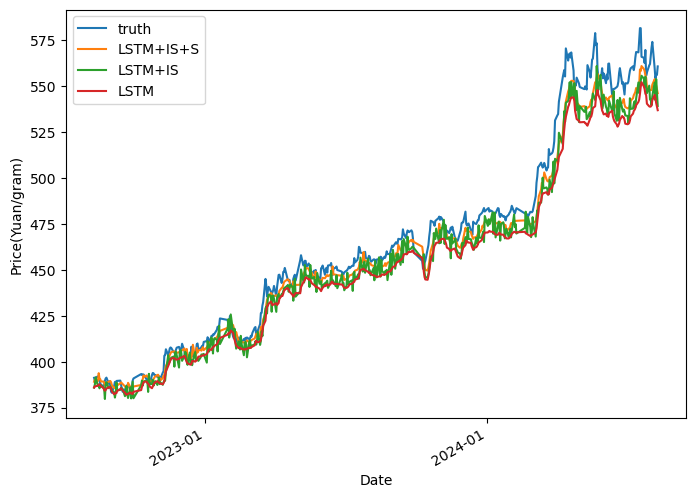

In [29]:
import matplotlib.dates as mdates
ax = data.plot(figsize = (8,6))
ax.set_ylabel('Price(Yuan/gram)')
ax.set_xlabel('Date')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.show()